## import e dati

In [181]:
from sklearnex import patch_sklearn
patch_sklearn()

seed = 42

# Import libraries
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(seed)
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectPercentile, f_classif, f_regression, SelectFromModel
from scipy.spatial.distance import pdist, squareform
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
import statistics
from sklearn.decomposition import PCA

import pickle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [182]:

file_path = "../CSV/data_rad_clin_DEF.csv"

data = pd.read_csv(file_path)
labels_column = data['label']
labels = labels_column.astype(int).tolist()

labels=np.array(labels)

# Estrazione dei numeri dai nomi dei pazienti
loaded_patients = data['IDs_new'].str.extract(r'(\d+)').astype(int).squeeze().tolist()

print("Labels:", labels)
print("Number of labels:", len(labels))
print("Patient Names: ", loaded_patients )



Labels: [0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1]
Number of labels: 129
Patient Names:  [5, 12, 15, 16, 17, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 68, 69, 70, 71, 74, 75, 76, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 126, 127, 128, 129, 133, 135, 136, 137, 138, 139, 141, 142, 144, 146, 147, 149, 150, 153, 155, 158, 159, 161, 163, 166, 168, 169, 170, 171, 175, 176, 178, 182, 183, 188, 189, 190, 193, 197, 199, 200, 205]


In [159]:
file_path = "../CSV/EncodersSliceMaggiore/InceptionV3_Slice_Maggiore.csv"
#file_path = "../CSV/RESNET50_Slice_Maggiore.csv"

df = pd.read_csv(file_path, sep=',')


df['Unnamed: 0'] = df['Unnamed: 0'].astype(int)

df_ordered = df.set_index('Unnamed: 0').loc[loaded_patients].reset_index()

df_features = df_ordered.drop(columns=['Unnamed: 0'])

features = df_features.to_numpy()

print(features)
print(features.shape)


[[1.2025036  0.5720962  0.5447646  ... 1.1191139  1.1651635  0.94069195]
 [0.80343825 3.566265   0.6634056  ... 3.4075627  0.         0.03612597]
 [2.1060686  0.7906144  0.82881254 ... 0.7284154  0.39611563 1.2460136 ]
 ...
 [1.6857586  0.71615916 0.         ... 0.         0.03223638 0.38544273]
 [0.77305645 1.3281341  0.         ... 2.4427867  0.         0.1173447 ]
 [0.6291671  3.0247831  1.1139797  ... 1.9223992  0.7866627  1.2099525 ]]
(129, 2048)


In [183]:
file_path = "../CSV/EncodersSliceMaggiore/Radiomica_Wavelet_2D.csv"

df = pd.read_csv(file_path, sep=',')
#df = df.astype(float)

# Colonne da rimuovere SOLO PER RADIOMICA
columns_to_remove = [
    'Slice',
    'diagnostics_Image-original_Mean',
    'diagnostics_Image-original_Minimum',
    'diagnostics_Image-original_Maximum',
    'diagnostics_Mask-original_VoxelNum',
    'diagnostics_Mask-original_VolumeNum',
]

df_cleaned = df.drop(columns=columns_to_remove)
df_features = df_cleaned.drop(columns=['Paziente'])

features = df_features.to_numpy()

print(features)
print(features.shape)  

[[5.83888273e-01 2.49810487e+01 2.57099203e+01 ... 5.69700030e+03
  5.01293376e-01 1.88681815e+02]
 [8.68120272e-01 2.78353641e+01 2.75136330e+01 ... 1.17856494e+04
  4.99502216e-01 2.32884640e+02]
 [6.68428011e-01 3.34967625e+01 3.44818793e+01 ... 1.10016612e+03
  1.37685835e-01 1.17271924e+02]
 ...
 [8.95387032e-01 3.24479655e+01 2.80178515e+01 ... 3.74357530e+02
  3.76839859e-01 4.56595117e+01]
 [7.82116308e-01 2.65896102e+01 2.56320112e+01 ... 1.71247332e+04
  8.63664634e-01 1.86559244e+02]
 [5.58702485e-01 3.61138047e+01 3.58468967e+01 ... 1.35620356e+04
  4.73861210e-01 2.66695842e+02]]
(129, 474)


## funzioni

In [184]:

## Rimozione feature correlation
def remove_highly_correlated_features(X, threshold=0.85):
    corr_matrix = np.corrcoef(X, rowvar=False)
    upper_triangle = np.triu(corr_matrix, k=1)
    to_drop = [column for column in range(upper_triangle.shape[0]) if any(abs(upper_triangle[column, :]) > threshold)]
    X_reduced = np.delete(X, to_drop, axis=1)
    return X_reduced, to_drop

## Rimozione features p_value
def remove_high_pvalue_features(X, y, alpha=0.05):
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X, y)
    p_values = selector.pvalues_
    features_to_keep = np.where(p_values < alpha)[0]
    X_reduced = X[:, features_to_keep]
    return X_reduced, features_to_keep

## FEATURE SELECTION LASSO
def select_features_with_lasso(X, y, alpha=0.001):
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefficients = lasso.coef_
    selected_features = np.where(coefficients != 0)[0]
    X_selected = X[:, selected_features]

    return X_selected, selected_features

## FEATURE SELECTION LOGISTIC
def logistic_regression_feature_selection(X, y, num_features):
    lr = LogisticRegression(max_iter=2000, random_state=42)
    lr.fit(X, y)
    coef_abs = np.abs(lr.coef_)
    feature_importances = np.mean(coef_abs, axis=0)
    selected_features = feature_importances.argsort()[-num_features:][::-1]
    X_selected = X[:, selected_features]
    return X_selected, selected_features

## FEATURE SELECTION MRMR
def mrmr_feature_selection(X, y, num_features):
    mi = mutual_info_classif(X, y, random_state=42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    distances = squareform(pdist(X_scaled.T, 'euclidean'))
    
    selected_features = []
    selected_indices = []

    first_feature_index = np.argmax(mi)
    selected_features.append(first_feature_index)
    selected_indices.append(first_feature_index)
    
    for _ in range(num_features - 1):
        max_relevance = -np.inf
        selected_feature_index = -1
        
        for i in range(X.shape[1]):
            if i in selected_indices:
                continue
            
            relevance = mi[i]
            redundancy = np.mean(distances[i, selected_indices])
            
            mrmr_score = relevance - redundancy
            
            if mrmr_score > max_relevance:
                max_relevance = mrmr_score
                selected_feature_index = i
        
        selected_features.append(selected_feature_index)
        selected_indices.append(selected_feature_index)

    X_selected = X[:, selected_indices]
    return X_selected, selected_indices

## FEATURE SELECTION RANDOM FOREST
def rf_feature_selection(X, y, num_features):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    feature_importances = rf.feature_importances_
    selected_features = np.argsort(feature_importances)[-num_features:][::-1]
    X_selected = X[:, selected_features]
    return X_selected, selected_features


## FEATURE SELECTION P_VALUE
# Seleziona e ordina le feature basate sui p-value con un test t di Student poi 
# ordina le feature in base al p-value in ordine crescente e seleziona le prime `num_features` caratteristiche.

def select_features_by_p_value(x_train_expanded, y_train_expanded, num_features):
    p_values = []
    num_features_total = x_train_expanded.shape[1]

    # Calcolo dei p-value per ciascuna feature
    for i in range(num_features_total):
        feature = x_train_expanded[:, i]
        group_0 = feature[y_train_expanded == 0]
        group_1 = feature[y_train_expanded == 1]
        t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
        p_values.append(p_val)


    p_values = np.array(p_values)

    # Ordinare tutte le caratteristiche in base ai p-value (dal più piccolo al più grande)
    sorted_indices = np.argsort(p_values)
    sorted_indices = sorted_indices[:num_features]

    x_train_selected = x_train_expanded[:, sorted_indices]

    return x_train_selected, sorted_indices



## FUNZIONE PER RIMUOVERE FEATURES SELEZIONATE
def filter_patients_features(filtered_patients, selected_features):
    filtered_patients_selected = []

    for patient_features in filtered_patients:
        # Select only the features specified in selected_features
        patient_features_selected = patient_features[:, selected_features]
        filtered_patients_selected.append(patient_features_selected)

    return filtered_patients_selected


## classificazione

In [185]:
## classificazione completa che ritorna la threshold migliore per la classificazione
def classification_method(selector, classifier, alpha, x_train_expanded, y_train_expanded, x_test, y_test, num_features, mode="Val", selected_features=[0], thresholds=np.arange(0.4, 0.6, 0.01)):
    best_f1_score = 0
    best_case = None

    if mode == "Val":
        selected_features = None 

        if num_features != len(x_train_expanded[0]) or alpha != 0:
            if selector == "lasso":
                X_selected, selected_features = select_features_with_lasso(x_train_expanded, y_train_expanded, alpha)
                if(len(selected_features)==0):
                    return 0
            elif selector == "logistic":
                X_selected, selected_features = logistic_regression_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "mrmr":
                X_selected, selected_features = mrmr_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "rf":
                X_selected, selected_features = rf_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "p_value":
                X_selected, selected_features = select_features_by_p_value(x_train_expanded,y_train_expanded, num_features=num_features)
            else:
                print("Wrong selector. Choose between: mrmr, rf, logistic, p_value, lasso")
                return

            x_test = x_test[:, selected_features]  # selezione delle feature anche su x_test
        else:
            X_selected = x_train_expanded
            selected_features = list(range(len(x_train_expanded[0])))  # Selezioniamo tutte le feature se non si fa feature selection

        number_features = len(selected_features)  # Numero di feature selezionate

        # Training del classificatore
        classifier.fit(X_selected, y_train_expanded)


    if (mode == "Test"): ## non addestra il classificatore e non fa feature selection
        x_test = x_test[:, selected_features]
        number_features = len(selected_features)
    

    y_proba_test = classifier.predict_proba(x_test)[:, 1]

    if(isinstance(thresholds, np.ndarray)== False): ## se la threshold viene data fissa
        thresholds=[thresholds]
        
    
    for threshold in thresholds:

            y_pred_custom_test = (y_proba_test >= threshold).astype(int)

            accuracy = accuracy_score(y_test, y_pred_custom_test)
            f1 = f1_score(y_test, y_pred_custom_test)
            roc_auc = roc_auc_score(y_test, y_proba_test)

            precision, recall, _ = precision_recall_curve(y_test, y_proba_test)
            pr_auc = auc(recall, precision)

            conf = confusion_matrix(y_test, y_pred_custom_test)
            bal_acc = balanced_accuracy_score(y_test, y_pred_custom_test)

            # Se il nuovo risultato è migliore rispetto al migliore attuale (in base all'f1 e altrimenti pr_auc)
            if f1 > best_f1_score or (f1 == best_f1_score and pr_auc > (best_case['pr_auc'] if best_case else 0)):
                best_f1_score = f1
                best_case = {
                    'alpha': alpha,
                    'num_features': number_features,
                    'selected_features': selected_features,
                    'pr_auc': pr_auc,
                    'roc_auc': roc_auc,
                    'f1': f1,
                    'accuracy': accuracy,
                    'confusion_matrix': conf,
                    'best_threshold': threshold,
                    'balanced accuracy': bal_acc
                }

    return best_case


#####################################################################################################################################

### questo ritorna le il vettore di probabilità senza fare la classificazione
def classification_method_withoutThreshold(selector, classifier, alpha, x_train_expanded, y_train_expanded, x_test, y_test, num_features, mode="Val", selected_features=[0]):

    if mode == "Val":
        selected_features = None 

        if num_features != len(x_train_expanded[0]) or alpha != 0:
            if selector == "lasso":
                X_selected, selected_features = select_features_with_lasso(x_train_expanded, y_train_expanded, alpha)
                if (len(selected_features)==0):
                    return [0],0,[0]
            elif selector == "logistic":
                X_selected, selected_features = logistic_regression_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "mrmr":
                X_selected, selected_features = mrmr_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "rf":
                X_selected, selected_features = rf_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "p_value":
                X_selected, selected_features = select_features_by_p_value(x_train_expanded,y_train_expanded, num_features=num_features)
            else:
                print("Wrong selector. Choose between: mrmr, rf, logistic, p_value, lasso")
                return

            x_test = x_test[:, selected_features]  # selezione delle feature anche su x_test
        else:
            X_selected = x_train_expanded
            selected_features = list(range(len(x_train_expanded[0])))  # Selezioniamo tutte le feature se non si fa feature selection

        number_features = len(selected_features)  # Numero di feature selezionate

        # Training del classificatore
        classifier.fit(X_selected, y_train_expanded)


    if (mode == "Test"): ## non addestra il classificatore e non fa feature selection
        x_test = x_test[:, selected_features]
        number_features = len(selected_features)
    

    y_proba_test = classifier.predict_proba(x_test)[:, 1]

 
    return y_proba_test, number_features, selected_features


#####################################################################################################################################


### classificazione effettuata con una threshold specifica
def classification_threshold(y_proba_test,y_test, threshold, alpha, number_features, selected_features):
        
            best_case = None

            y_pred_custom_test = (y_proba_test >= threshold).astype(int)
            accuracy = accuracy_score(y_test, y_pred_custom_test)
            f1 = f1_score(y_test, y_pred_custom_test)
            roc_auc = roc_auc_score(y_test, y_proba_test)

            precision, recall, _ = precision_recall_curve(y_test, y_proba_test)
            pr_auc = auc(recall, precision)

            conf = confusion_matrix(y_test, y_pred_custom_test)
            best_case = {
                    'alpha': alpha,
                    'num_features': number_features,
                    'selected_features': selected_features,
                    'pr_auc': pr_auc,
                    'roc_auc': roc_auc,
                    'f1': f1,
                    'accuracy': accuracy,
                    'confusion_matrix': conf,
                    'threshold': threshold
                }
                
            if not best_case:
                 print("Attenzione caso vuoto") 
            return best_case

#####################################################################################################################################


# metodo che definisce la threshold ottimale attraverso Youden's J statistic (threshold_selection= 'y')
# oppure attraverso la distanza euclidea dalla curva ROC (threshold_selection= 'd')
def classification_method_selection(selector, classifier, alpha, x_train_expanded, y_train_expanded, x_test, y_test, num_features, threshold_selection, mode="Val", selected_features=[0]):
    best_case = None

    if mode == "Val":
        selected_features = None 

        if num_features != len(x_train_expanded[0]) or alpha != 0:
            if selector == "lasso":
                X_selected, selected_features = select_features_with_lasso(x_train_expanded, y_train_expanded, alpha)
                if(len(selected_features)==0):
                    return 0
            elif selector == "logistic":
                X_selected, selected_features = logistic_regression_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "mrmr":
                X_selected, selected_features = mrmr_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "rf":
                X_selected, selected_features = rf_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "p_value":
                X_selected, selected_features = select_features_by_p_value(x_train_expanded,y_train_expanded, num_features=num_features)
            else:
                print("Wrong selector. Choose between: mrmr, rf, logistic, p_value, lasso")
                return

            x_test = x_test[:, selected_features]  # selezione delle feature anche su x_test
        else:
            X_selected = x_train_expanded
            selected_features = list(range(len(x_train_expanded[0])))  # Selezioniamo tutte le feature se non si fa feature selection

        number_features = len(selected_features)  # Numero di feature selezionate

        classi=classifierinitialization(classifier, X_selected, y_train_expanded )
        # Training del classificatore
        classi.fit(X_selected, y_train_expanded)


    if (mode == "Test"): ## non addestra il classificatore e non fa feature selection
        x_test = x_test[:, selected_features]
        number_features = len(selected_features)
    

    y_proba_test = classifier.predict_proba(x_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_proba_test)
    precision, recall, _ = precision_recall_curve(y_test, y_proba_test)
    pr_auc = auc(recall, precision)
        
    fpr,tpr,threshold=roc_curve(y_test,y_proba_test,pos_label=1)
    youden_j = tpr - fpr
    optimal_threshold = threshold[np.argmax(youden_j)]

    ## due modalità 
    if threshold_selection == 'y':
        youden_j = tpr - fpr
        optimal_threshold = threshold[np.argmax(youden_j)]
    elif threshold_selection == 'd':
        distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
        optimal_threshold = threshold[np.argmin(distances)]
    else:
        print('Threshold non valida!')
        return None

    
    y_pred_custom_test = (y_proba_test >= optimal_threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred_custom_test)
    f1 = f1_score(y_test, y_pred_custom_test)
    conf = confusion_matrix(y_test, y_pred_custom_test)


    best_case = {
        'alpha': alpha,
        'num_features': number_features,
        'selected_features': selected_features,
        'pr_auc': pr_auc,
        'roc_auc': roc_auc,
        'f1': f1,
        'accuracy': accuracy,
        'confusion_matrix': conf,
        'best_threshold': optimal_threshold,
        'threshold_mode': threshold_selection
    }

    return best_case


def classifierinitialization(classifier):
    if classifier == 'RandomForest':
                            classi = RandomForestClassifier(n_estimators=100, random_state=42)
    elif classifier == 'Logistic':
                            classi = LogisticRegression(random_state=42, max_iter=2000)
    elif classifier == 'SVM':
                            classi = SVC(kernel='rbf', probability=True, random_state=42)
    elif classifier == 'XgBoost':
                            classi = XGBClassifier(random_state=42)
    elif classifier == 'MLP':
                            classi = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive', activation = 'logistic')
    elif classifier == 'ensemble':
                            rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
                            logistic_model = LogisticRegression(random_state=42, max_iter=2000)
                            svc_model = SVC(kernel='rbf', probability=True, random_state=42)
                            classi = VotingClassifier(
                                estimators=[
                                    ('random_forest', rf_model),
                                    ('logistic', logistic_model),
                                    ('svc', svc_model)
                                ],
                                voting='soft'
                                )
    return classi


## split

In [186]:
Y_train1, y_test, X_train1, X_test= train_test_split(labels, features, test_size=0.3, shuffle=False, random_state=1)
Y_train, y_val, X_train, x_val= train_test_split(Y_train1, X_train1, test_size=0.3, shuffle=True, stratify=Y_train1 ,random_state=3)
#Y_train, y_val, X_train, x_val= train_test_split(Y_train1, X_train1, test_size=0.3, shuffle=False,random_state=3)

print("Number of train patients: ", len(X_train))
print("Number of test patients: ", len(y_test))
print("Number of val patients: ", len(y_val))

print("Number of features for every image: ", X_train[0].shape[0] )


Number of train patients:  63
Number of test patients:  39
Number of val patients:  27
Number of features for every image:  474


In [188]:
# Inizialmente, tutti gli indici delle feature sono mantenuti
original_features = np.arange(X_train.shape[1])
print(X_train.shape[1])

## FEATURE CORRELATION

# Rimuovi le feature altamente correlate, mantenendo traccia degli indici originali
X_train_reduced, dropped_features = remove_highly_correlated_features(X_train, 0.8)
original_features = np.delete(original_features, dropped_features)  # Aggiorna gli indici originali
X_val_reduced = np.delete(x_val, dropped_features, axis=1)
X_test_reduced = np.delete(X_test, dropped_features, axis=1)
X_train_reduced1 = np.delete(X_train1, dropped_features, axis=1)

print(f"Indici delle feature dopo la rimozione per correlazione: {original_features}")
print(X_train_reduced.shape)
#print(X_test_reduced.shape)
#print(X_val_reduced.shape)

## RIMOZIONE FEATURES CON P-VALUE ELEVATO

# Rimuovi le feature con p-value elevato, mantenendo traccia degli indici originali
#X_train_reduced, features_to_keep = remove_high_pvalue_features(X_train_reduced, Y_train, alpha=0.05)
#original_features = original_features[features_to_keep]  # Aggiorna gli indici originali
#X_val_reduced = X_val_reduced[:, features_to_keep]
#X_test_reduced = X_test_reduced[:, features_to_keep]
#X_train_reduced1 = X_train_reduced1[:, features_to_keep]

#print(f"Indici delle feature dopo la rimozione per p-value: {original_features}")
print(X_train_reduced.shape)
#print(X_test_reduced.shape)
#print(X_train_reduced1.shape)
#print(X_val_reduced.shape)

474
Indici delle feature dopo la rimozione per correlazione: [  0   4   5   6   8  86  93 110 111 116 125 132 135 139 179 189 203 204
 209 218 225 228 232 256 272 283 293 296 297 302 308 311 321 333 353 360
 366 367 370 372 375 377 379 380 381 391 395 411 418 453 459 465 467 468
 469 470 473]
(63, 57)
(63, 57)


In [189]:


#alpha_1 = np.linspace(0.01, 0.6, 30).tolist() ## RANGE PER RESNET

alpha_1 = np.linspace(0.005, 0.5, 30).tolist() ## RANGE PER VGG

#alpha_2 = np.linspace(0, 0.005, 21).tolist()

alpha_values=alpha_1 
#alpha_values.remove(0.0)


#thresholds=np.arange(0.4, 0.61, 0.01) 

thresholds=[0.5]

selectors=['lasso', 'mrmr','rf', 'logistic']

classifiers=['XgBoost',  'SVM', 'ensemble','RandomForest', 'Logistic', 'MLP']


## loop

In [190]:

template_dict = {
                'classifier': None,
                'selector': None,
                'alpha': None,
                'num_features': None,
                'pr_auc': None,
                'roc_auc': None,
                'f1': None,
                'accuracy': None,
                'confusion_matrix': [],
                'selected_features': [],
                'balanced accuracy': None
            }

## creazione di dizionari vuoti (range con numero elevato casuale)
results_val = [template_dict.copy() for _ in range(30000)]
results_val.append(template_dict.copy())

results_test = [template_dict.copy() for _ in range(3000)]
results_test.append(template_dict.copy())

smote = SMOTE(random_state=42)
 
k=0


In [191]:

for i, classifier in enumerate(classifiers):
        print("Starting with classifier:", classifier)
        for j, selector in enumerate(selectors):
            print("Starting with selector:", selector)

            if(selector=='lasso'):

                for alpha in alpha_values:
                    print("Doing alpha ", alpha )
                    classi= classifierinitialization(classifier)

                    x_resized, y_resized = smote.fit_resample(X_train_reduced, Y_train)

                    best_case_val= classification_method(selector, classi, alpha, x_resized, y_resized, X_val_reduced, y_val, 0, mode="Val", selected_features=[0], thresholds=0.5)
                    
                    if(best_case_val==0 or best_case_val['num_features'] >= 30):
                         continue
                    
                    results_val[k] = {
                                        'classifier': classifier,
                                        'selector': selector,
                                        'alpha': alpha,
                                        'num_features': best_case_val['num_features'],
                                        'selected_features': best_case_val['selected_features'],
                                        'pr_auc': best_case_val['pr_auc'],
                                        'roc_auc': best_case_val['roc_auc'],
                                        'f1': best_case_val['f1'],
                                        'accuracy': best_case_val['accuracy'],
                                        'confusion_matrix': best_case_val['confusion_matrix'],
                                        'balanced accuracy': best_case_val['balanced accuracy'],
                                        }

                    #print(best_case_val['num_features'])
                    classi= classifierinitialization(classifier)

                    best_case_test= classification_method(selector, classi, alpha, X_train_reduced1, Y_train1, X_test_reduced, y_test, 0, mode="Val", selected_features=[0], thresholds=0.5)

                    if(best_case_test==0):
                         continue
                    results_test[k] = {
                                        'classifier': classifier,
                                        'selector': selector,
                                        'alpha': alpha,
                                        'num_features': best_case_test['num_features'],
                                        'selected_features': best_case_test['selected_features'],
                                        'pr_auc': best_case_test['pr_auc'],
                                        'roc_auc': best_case_test['roc_auc'],
                                        'f1': best_case_test['f1'],
                                        'accuracy': best_case_test['accuracy'],
                                        'confusion_matrix': best_case_test['confusion_matrix'],
                                        'balanced accuracy': best_case_test['balanced accuracy'],
                                        }
                    k = k + 1

            else:
                #limit=len(x_train_reduced[0]) + 1
                limit=30
                for t in range(1, limit):
                        classi= classifierinitialization(classifier)
                        
                        x_resized, y_resized = smote.fit_resample(X_train_reduced, Y_train)

                        best_case_val= classification_method(selector, classi, 0, x_resized, y_resized, X_val_reduced, y_val, t, mode="Val", selected_features=[0], thresholds=0.5)
                            
                        results_val[k] = {
                                            'classifier': classifier,
                                            'selector': selector,
                                            'alpha': 0,
                                            'num_features': t,
                                            'selected_features': best_case_val['selected_features'],
                                            'pr_auc': best_case_val['pr_auc'],
                                            'roc_auc': best_case_val['roc_auc'],
                                            'f1': best_case_val['f1'],
                                            'accuracy': best_case_val['accuracy'],
                                            'confusion_matrix': best_case_val['confusion_matrix'],
                                            'balanced accuracy': best_case_val['balanced accuracy'],
                                            }
                        #print(results_val_others[k]['f1'])
                        classi= classifierinitialization(classifier)

                        best_case_test= classification_method(selector, classi, 0, X_train_reduced1, Y_train1, X_test_reduced, y_test, t, mode="Val", selected_features=[0], thresholds=0.5)

                        results_test[k] = {
                                            'classifier': classifier,
                                            'selector': selector,
                                            'alpha': 0,
                                            'num_features': t,
                                            'selected_features': best_case_test['selected_features'],
                                            'pr_auc': best_case_test['pr_auc'],
                                            'roc_auc': best_case_test['roc_auc'],
                                            'f1': best_case_test['f1'],
                                            'accuracy': best_case_test['accuracy'],
                                            'confusion_matrix': best_case_test['confusion_matrix'],
                                            'balanced accuracy': best_case_test['balanced accuracy'],
                                            }
                        k = k + 1

Starting with classifier: XgBoost
Starting with selector: lasso
Doing alpha  0.005
Doing alpha  0.02206896551724138
Doing alpha  0.03913793103448276
Doing alpha  0.05620689655172414
Doing alpha  0.07327586206896552
Doing alpha  0.0903448275862069
Doing alpha  0.10741379310344829
Doing alpha  0.12448275862068967
Doing alpha  0.14155172413793105
Doing alpha  0.15862068965517243
Doing alpha  0.1756896551724138
Doing alpha  0.19275862068965519
Doing alpha  0.20982758620689657
Doing alpha  0.22689655172413795
Doing alpha  0.24396551724137933
Doing alpha  0.26103448275862073
Doing alpha  0.2781034482758621
Doing alpha  0.29517241379310344
Doing alpha  0.31224137931034485
Doing alpha  0.32931034482758625
Doing alpha  0.3463793103448276
Doing alpha  0.36344827586206896
Doing alpha  0.38051724137931037
Doing alpha  0.3975862068965518
Doing alpha  0.4146551724137931
Doing alpha  0.4317241379310345
Doing alpha  0.4487931034482759
Doing alpha  0.4658620689655173
Doing alpha  0.48293103448275865
Do

## rimozione e heatmaps

In [172]:
# Remove all entries from results_test where 'classifier' is None
results_test = [entry for entry in results_test if entry['classifier'] is not None]

# Print the cleaned results_test to verify
print(f"Filtered results_test: {len(results_test)} entries remaining")

# Remove all entries from results_test where 'classifier' is None
results_val = [entry for entry in results_val if entry['classifier'] is not None]

# Print the cleaned results_test to verify
print(f"Filtered results_test: {len(results_val)} entries remaining")

Filtered results_test: 648 entries remaining
Filtered results_test: 648 entries remaining


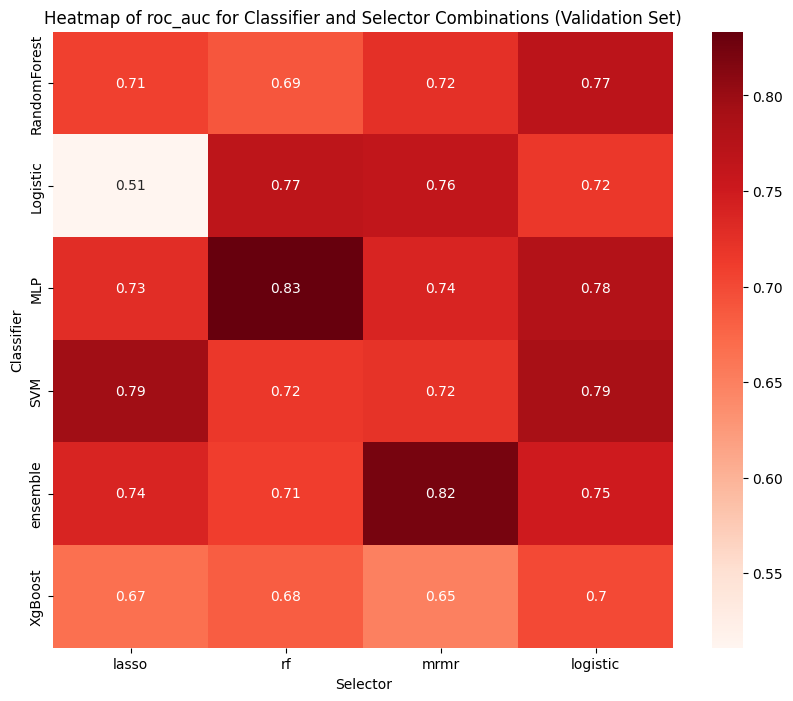

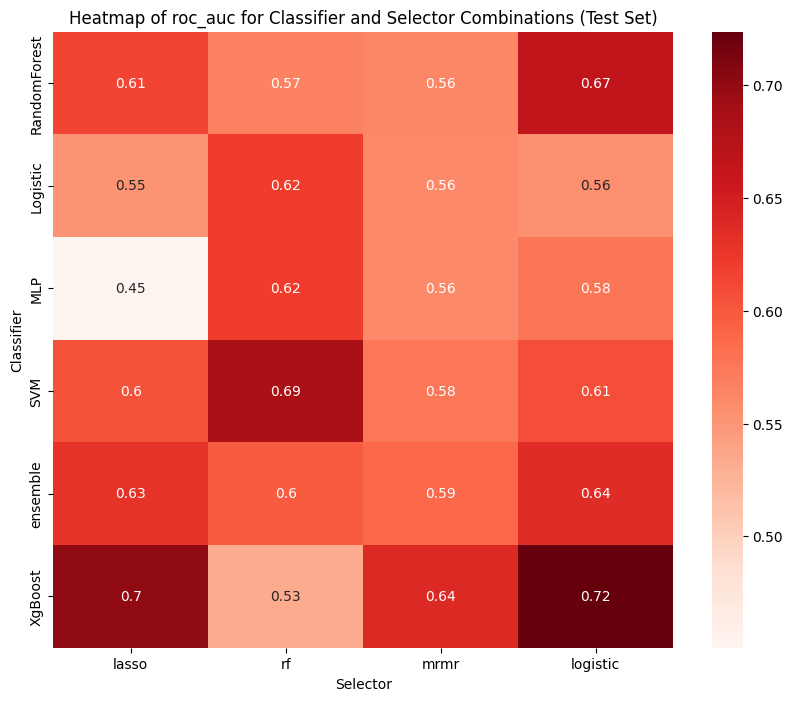

In [34]:
selected_metric = 'roc_auc'  # Puoi cambiare con la metrica che desideri utilizzare

# Definisci l'ordine fisso dei classifiers e dei selectors
fixed_classifiers = ['RandomForest', 'Logistic', 'MLP', 'SVM', 'ensemble', 'XgBoost']  # Aggiungi qui tutti i classifiers che usi
fixed_selectors = ['lasso', 'rf', 'mrmr', 'logistic']  # Aggiungi qui tutti i selectors che usi

# Ordina la lista results_val per la metrica selezionata (validation set)
results_val_sorted = sorted(results_val, key=lambda x: x[selected_metric], reverse=True)

# Crea una tabella per tracciare il migliore per ogni combinazione di classifier e selector sul validation set
best_combinations_val = {}

for result in results_val_sorted:
    classifier = result['classifier']
    selector = result['selector']
    
    # Se non esiste già una combinazione per questo classificatore e selettore, la memorizziamo
    if (classifier, selector) not in best_combinations_val:
        best_combinations_val[(classifier, selector)] = result

# Crea una matrice per la heatmap sul validation set con righe fisse
heatmap_data_val = np.zeros((len(fixed_classifiers), len(fixed_selectors)))

# Riempie la matrice con i valori della metrica selezionata sul validation set
for i, classifier in enumerate(fixed_classifiers):
    for j, selector in enumerate(fixed_selectors):
        if (classifier, selector) in best_combinations_val:
            heatmap_data_val[i, j] = best_combinations_val[(classifier, selector)][selected_metric]

# Genera la heatmap per il validation set (sfumature di rosso)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_val, annot=True, xticklabels=fixed_selectors, yticklabels=fixed_classifiers, cmap="Reds")
plt.title(f"Heatmap of {selected_metric} for Classifier and Selector Combinations (Validation Set)")
plt.xlabel("Selector")
plt.ylabel("Classifier")
plt.show()

# Ora facciamo lo stesso per il test set, usando le stesse combinazioni dal validation
heatmap_data_test = np.zeros((len(fixed_classifiers), len(fixed_selectors)))

# Riempie la matrice con i valori della metrica selezionata sul test set per le stesse combinazioni
for i, classifier in enumerate(fixed_classifiers):
    for j, selector in enumerate(fixed_selectors):
        if (classifier, selector) in best_combinations_val:
            # Trova la corrispondente combinazione nel test set
            for result in results_test:
                if result['classifier'] == classifier and result['selector'] == selector:
                    heatmap_data_test[i, j] = result[selected_metric]
                    break

# Genera la heatmap per il test set (sfumature di rosso)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_test, annot=True, xticklabels=fixed_selectors, yticklabels=fixed_classifiers, cmap="Reds")
plt.title(f"Heatmap of {selected_metric} for Classifier and Selector Combinations (Test Set)")
plt.xlabel("Selector")
plt.ylabel("Classifier")
plt.show()


## creazione codice combinato

### pretrainata

In [84]:
import numpy as np
import pandas as pd
import csv

# File path del dataset originale
file_path = "../CSV/EncodersSliceMaggiore/InceptionV3_Slice_Maggiore.csv"  # O sostituisci con RESNET50

# Carica il dataset originale
df = pd.read_csv(file_path, sep=',')

# Converte 'Unnamed: 0' in intero e ordina secondo i pazienti caricati (se presenti)
df['Unnamed: 0'] = df['Unnamed: 0'].astype(int)
df_ordered = df.set_index('Unnamed: 0').loc[loaded_patients].reset_index()

# Trova la miglior combinazione basata su balanced accuracy nel validation set
selected_metric = 'balanced accuracy'
best_combination_val = max(results_val, key=lambda x: x[selected_metric])

# Stampa la miglior combinazione
print("Miglior combinazione nel validation set:")
print(f"Classifier: {best_combination_val['classifier']}")
print(f"Selector: {best_combination_val['selector']}")
print(f"{selected_metric}: {best_combination_val[selected_metric]}")
print(f"Selected Features: {best_combination_val['selected_features']}")  # Questo contiene gli indici delle feature selezionate

# Seleziona gli indici originali delle feature
selected_features = best_combination_val['selected_features']
selected_original_features = original_features[selected_features]

# Stampa gli indici originali delle feature selezionate
print(f"Indici delle feature originali selezionate: {selected_original_features}")

# Seleziona solo le colonne delle feature originali selezionate dal CSV originale
selected_feature_columns = df_features.iloc[:, selected_original_features]

# Aggiungi la colonna paziente
df_selected = pd.concat([df_ordered[['Unnamed: 0']], selected_feature_columns], axis=1)

# Rinomina la colonna 'Unnamed: 0' come 'Paziente'
df_selected.rename(columns={'Unnamed: 0': 'Paziente'}, inplace=True)

# Salva il CSV con le feature selezionate
output_csv_filename = r"\Users\bsbar\Desktop\selected_features_inc.csv"
df_selected.to_csv(output_csv_filename, index=False)

print(f"Le feature selezionate sono state salvate nel file '{output_csv_filename}'")

Miglior combinazione nel validation set:
Classifier: SVM
Selector: lasso
balanced accuracy: 0.8500000000000001
Selected Features: [  7  12  19  40  44  60  77 106 117]
Indici delle feature originali selezionate: [ 320  392  629 1057 1116 1309 1508 1847 2038]
Le feature selezionate sono state salvate nel file '\Users\bsbar\Desktop\selected_features_inc.csv'


### Radiomica

In [ ]:
# File path del dataset originale
file_path = "../CSV/EncodersSliceMaggiore/Radiomica_Wavelet_2D.csv"

# Carica il dataset originale e rimuovi le colonne specificate
df = pd.read_csv(file_path, sep=',')

# Colonne da rimuovere specifiche per Radiomica
columns_to_remove = [
    'Slice',
    'diagnostics_Image-original_Mean',
    'diagnostics_Image-original_Minimum',
    'diagnostics_Image-original_Maximum',
    'diagnostics_Mask-original_VoxelNum',
    'diagnostics_Mask-original_VolumeNum',
]

# Pulizia del dataset rimuovendo le colonne inutili
df_cleaned = df.drop(columns=columns_to_remove)

# Estrai le features rimuovendo la colonna 'Paziente'
df_features = df_cleaned.drop(columns=['Paziente'])
features = df_features.to_numpy()

# Trova la miglior combinazione basata su balanced accuracy nel validation set
selected_metric = 'balanced accuracy'
best_combination_val = max(results_val, key=lambda x: x[selected_metric])

# Stampa la miglior combinazione
print("Miglior combinazione nel validation set:")
print(f"Classifier: {best_combination_val['classifier']}")
print(f"Selector: {best_combination_val['selector']}")
print(f"{selected_metric}: {best_combination_val[selected_metric]}")
print(f"Selected Features: {best_combination_val['selected_features']}")  # Questo contiene gli indici delle feature selezionate

# Seleziona gli indici originali delle feature
selected_features = best_combination_val['selected_features']
selected_original_features = original_features[selected_features]

# Stampa gli indici originali delle feature selezionate
print(f"Indici delle feature originali selezionate: {selected_original_features}")

# Seleziona solo le colonne delle feature originali selezionate dal CSV originale
selected_feature_columns = df_features.iloc[:, selected_original_features]

# Aggiungi la colonna paziente
df_selected = pd.concat([df_cleaned[['Paziente']], selected_feature_columns], axis=1)

# Salva il CSV con le feature selezionate
output_csv_filename = "selected_features_radiomica_with_patients.csv"
df_selected.to_csv(output_csv_filename, index=False)

print(f"Le feature selezionate sono state salvate nel file '{output_csv_filename}'")

### csv unito

In [86]:
# Percorsi dei due file CSV creati in precedenza
csv_vgg19 = r"\Users\bsbar\Desktop\selected_features_inc.csv"
csv_radiomica = r"\Users\bsbar\Desktop\selected_features_radiomica_with_patients.csv"

# Carica i due CSV
df_vgg19 = pd.read_csv(csv_vgg19)
df_radiomica = pd.read_csv(csv_radiomica)

# Assicurati che i due CSV abbiano una colonna in comune per l'unione (es. 'Paziente')
# Unisci i due dataframe sulla colonna 'Paziente'
df_combined = pd.merge(df_vgg19, df_radiomica, on='Paziente', suffixes=('_vgg', '_radiomica'))

# Salva il dataframe combinato in un nuovo file CSV
output_csv_filename = r"\Users\bsbar\Desktop\combinazione_features_selezionate_Rad_inc.csv"
df_combined.to_csv(output_csv_filename, index=False)

print(f"I due CSV sono stati uniti e salvati in '{output_csv_filename}'")

I due CSV sono stati uniti e salvati in '\Users\bsbar\Desktop\combinazione_features_selezionate_Rad_inc.csv'


## Esecuzione test unito

In [98]:
def classification_method_united(classifier, x_train, y_train, x_test, y_test):

    best_case = None

    # Inizializza il classificatore usando la funzione di inizializzazione
    classi = classifierinitialization(classifier)
    
    # Addestra il classificatore
    classi.fit(x_train, y_train)

    # Calcola le probabilità di predizione per il test set
    y_proba_test = classi.predict_proba(x_test)[:, 1]

    # Soglia fissa a 0.5
    threshold = 0.5
    y_pred_custom_test = (y_proba_test >= threshold).astype(int)

    # Calcola le metriche di classificazione
    accuracy = accuracy_score(y_test, y_pred_custom_test)
    f1 = f1_score(y_test, y_pred_custom_test)
    roc_auc = roc_auc_score(y_test, y_proba_test)
    precision, recall, _ = precision_recall_curve(y_test, y_proba_test)
    pr_auc = auc(recall, precision)
    conf = confusion_matrix(y_test, y_pred_custom_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred_custom_test)

    # Salva i risultati del miglior caso
    best_case = {
        'classifier': classifier,
        'pr_auc': pr_auc,
        'roc_auc': roc_auc,
        'f1': f1,
        'accuracy': accuracy,
        'confusion_matrix': conf,
        'best_threshold': threshold,
        'balanced_accuracy': bal_acc
    }

    return best_case

In [152]:
file_path = r"\Users\bsbar\Desktop\combinazione_features_selezionate_Rad_vgg.csv"  # Sostituisci con il tuo percorso del file
df = pd.read_csv(file_path)

# Droppa la prima colonna
X = df.drop(df.columns[0], axis=1)

Y_train1, y_test, X_train1, X_test= train_test_split(labels, X, test_size=0.3, shuffle=False)
Y_train, y_val, X_train, X_val= train_test_split(Y_train1, X_train1, test_size=0.3, shuffle=True, random_state=3, stratify=Y_train1)

print(X_train.shape)
print(Y_train)

(63, 30)
[0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0]


In [153]:
classifier_inc = "SVM"
classifier_vgg = "SVM"
classifier_res = "Logistic"
classifier_rad = "RandomForest"

print(f"\n--- Risultati per {classifier_rad} ---")
## VAL
results = classification_method_united(classifier_rad, X_train, Y_train, X_val, y_val)
## TEST
#results = classification_method_united(classifier_rad, X_train1, Y_train1, X_test, y_test)
    
# Stampa tutti i risultati ottenuti
print(f"Classifier: {results['classifier']}")
print(f"Best F1 Score: {results['f1']:.4f}")
print(f"ROC AUC: {results['roc_auc']:.4f}")
print(f"PR AUC: {results['pr_auc']:.4f}")
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Balanced Accuracy: {results['balanced_accuracy']:.4f}")
print(f"Best Threshold: {results['best_threshold']}")
print(f"Confusion Matrix:\n{results['confusion_matrix']}")

print(f"\n--- Risultati per {classifier_res} ---")
results = classification_method_united(classifier_vgg, X_train, Y_train, X_val, y_val)
## TEST
#results = classification_method_united(classifier_vgg, X_train1, Y_train1, X_test, y_test)
    
# Stampa tutti i risultati ottenuti
print(f"Classifier: {results['classifier']}")
print(f"Best F1 Score: {results['f1']:.4f}")
print(f"ROC AUC: {results['roc_auc']:.4f}")
print(f"PR AUC: {results['pr_auc']:.4f}")
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Balanced Accuracy: {results['balanced_accuracy']:.4f}")
print(f"Best Threshold: {results['best_threshold']}")
print(f"Confusion Matrix:\n{results['confusion_matrix']}")


--- Risultati per RandomForest ---
Classifier: RandomForest
Best F1 Score: 0.5000
ROC AUC: 0.7306
PR AUC: 0.6202
Accuracy: 0.6296
Balanced Accuracy: 0.6083
Best Threshold: 0.5
Confusion Matrix:
[[12  3]
 [ 7  5]]

--- Risultati per Logistic ---
Classifier: SVM
Best F1 Score: 0.6400
ROC AUC: 0.7611
PR AUC: 0.6860
Accuracy: 0.6667
Balanced Accuracy: 0.6667
Best Threshold: 0.5
Confusion Matrix:
[[10  5]
 [ 4  8]]


In [156]:
selected_metric = 'balanced accuracy'  # Imposta la metrica su balanced_accuracy

# Definisci l'ordine fisso dei classifiers e dei selectors
fixed_classifiers = ['RandomForest', 'Logistic', 'MLP', 'SVM', 'ensemble', 'XgBoost']  # Aggiungi qui tutti i classifiers che usi
fixed_selectors = ['lasso', 'rf', 'mrmr', 'logistic']  # Aggiungi qui tutti i selectors che usi

# Ordina la lista results_val per la metrica selezionata (balanced accuracy nel validation set)
results_val_sorted = sorted(results_val, key=lambda x: x[selected_metric], reverse=True)

# Stampa i primi 10 modelli sul validation set in base alla balanced accuracy, senza ripetizioni di classifier, selector e numero di features
print("Top 10 unique models sorted by balanced_accuracy on validation set:")
unique_combinations = set()  # Set per tenere traccia delle combinazioni già considerate
top_models = []

for result in results_val_sorted:
    classifier = result['classifier']
    selector = result['selector']
    num_features = result['num_features']  # Se hai il numero di features come parte del risultato
    
    # Controlla se la combinazione è già stata aggiunta
    combination = (classifier, selector, num_features)
    if combination not in unique_combinations:
        unique_combinations.add(combination)
        top_models.append(result)
    
    # Ferma il ciclo dopo aver trovato le prime 10 combinazioni uniche
    if len(top_models) == 10:
        break

# Stampa i modelli unici
for i, result in enumerate(top_models):
    classifier = result['classifier']
    selector = result['selector']
    num_features = result['num_features']
    bal_acc = result[selected_metric]
    print(f"{i+1}. Classifier: {classifier}, Selector: {selector}, Features: {num_features}, Balanced Accuracy: {bal_acc:.4f}")

Top 10 unique models sorted by balanced_accuracy on validation set:
1. Classifier: SVM, Selector: lasso, Features: 9, Balanced Accuracy: 0.8500
2. Classifier: SVM, Selector: lasso, Features: 10, Balanced Accuracy: 0.8500
3. Classifier: ensemble, Selector: lasso, Features: 9, Balanced Accuracy: 0.8500
4. Classifier: ensemble, Selector: lasso, Features: 10, Balanced Accuracy: 0.8500
5. Classifier: ensemble, Selector: lasso, Features: 5, Balanced Accuracy: 0.8500
6. Classifier: ensemble, Selector: lasso, Features: 3, Balanced Accuracy: 0.8500
7. Classifier: SVM, Selector: lasso, Features: 4, Balanced Accuracy: 0.8250
8. Classifier: ensemble, Selector: lasso, Features: 4, Balanced Accuracy: 0.8250
9. Classifier: SVM, Selector: lasso, Features: 7, Balanced Accuracy: 0.8167
10. Classifier: SVM, Selector: lasso, Features: 6, Balanced Accuracy: 0.8167


In [179]:
def ensemble_voting_classifiers_unique_classifier_selector(x_train, y_train, x_test, y_test, results_val, num_classifiers=5):
    """
    Funzione che ri-allea i migliori `num_classifiers` classificatori su train + validation, garantendo che le combinazioni di classifier e selector siano uniche.
    Include anche la visualizzazione della confusion matrix.
    """
    # Ordina i risultati per balanced accuracy
    selected_metric = 'balanced accuracy'
    results_val_sorted = sorted(results_val, key=lambda x: x[selected_metric], reverse=True)
    
    # Manteniamo traccia delle combinazioni uniche di classifier e selector
    unique_combinations = set()
    top_results = []
    
    # Selezioniamo solo combinazioni uniche di classifier e selector
    for result in results_val_sorted:
        classifier_name = result['classifier']
        selector = result['selector']
        
        # Definisci la combinazione unica come una tupla di classifier e selector
        combination = (classifier_name, selector)
        
        if combination not in unique_combinations:
            unique_combinations.add(combination)
            top_results.append(result)
        
        # Interrompe il ciclo una volta che abbiamo abbastanza classificatori unici
        if len(top_results) == num_classifiers:
            break

    classifiers = []
    predictions = []
    
    # Stampa le combinazioni utilizzate
    print("Classifier, Selector used in the ensemble:")
    for result in top_results:
        classifier_name = result['classifier']
        selector = result['selector']
        num_features = result['num_features']
        selected_features = result['selected_features']  # Lista delle features selezionate
        
        # Filtra le features per x_train e x_test
        x_train_filtered = x_train[:, selected_features]
        x_test_filtered = x_test[:, selected_features]
        
        # Inizializza il classificatore con la tua funzione
        clf = classifierinitialization(classifier_name)
        
        # Ri-allenamento del classificatore con le features selezionate
        clf.fit(x_train_filtered, y_train)
        
        # Aggiungi il modello alla lista per il voting ensemble
        classifiers.append((f'{classifier_name}_{len(selected_features)}features', clf))
        
        # Fai le predizioni su x_test_filtered
        y_pred = clf.predict(x_test_filtered)
        predictions.append(y_pred)
        
        # Stampa la combinazione usata
        print(f"Classifier: {classifier_name}, Selector: {selector}, Num Features: {num_features}")
    
    # Applica hard voting: raccogli tutte le predizioni e fai il voto a maggioranza
    predictions = np.array(predictions)
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    # Calcola le metriche
    accuracy = accuracy_score(y_test, final_predictions)
    f1 = f1_score(y_test, final_predictions)
    balanced_acc = balanced_accuracy_score(y_test, final_predictions)
    precision = precision_score(y_test, final_predictions)
    recall = recall_score(y_test, final_predictions)

    # Stampa le metriche
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Calcola e visualizza la confusion matrix
    conf_matrix = confusion_matrix(y_test, final_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Visualizza la confusion matrix
    plt.figure(figsize=(8, 6))
    plt.title("Confusion Matrix")
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Restituisce le predizioni e le metriche
    return final_predictions, {
        'accuracy': accuracy,
        'f1': f1,
        'balanced_acc': balanced_acc,
        'precision': precision,
        'recall': recall,
        'conf_matrix': conf_matrix
    }

Classifier, Selector used in the ensemble:
Classifier: SVM, Selector: lasso, Num Features: 9
Classifier: ensemble, Selector: lasso, Num Features: 9
Classifier: Logistic, Selector: lasso, Num Features: 5
Classifier: MLP, Selector: lasso, Num Features: 3
Classifier: RandomForest, Selector: lasso, Num Features: 3
Accuracy: 0.5385
F1 Score: 0.4375
Balanced Accuracy: 0.5509
Precision: 0.3500
Recall: 0.5833
Confusion Matrix:
[[14 13]
 [ 5  7]]


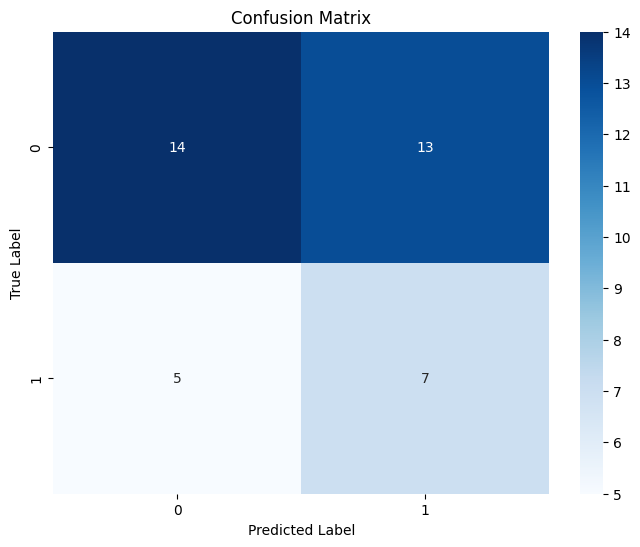

{'accuracy': 0.5384615384615384,
 'f1': 0.4375,
 'balanced_acc': 0.5509259259259259,
 'precision': 0.35,
 'recall': 0.5833333333333334,
 'conf_matrix': array([[14, 13],
        [ 5,  7]], dtype=int64)}

In [180]:
predictions, metrics = ensemble_voting_classifiers_unique_classifier_selector(X_train_reduced1, Y_train1, X_test_reduced, y_test, results_val, num_classifiers=5)

# Stampa delle metriche
metrics